In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [3]:

def get_zeff(filename):
    
    
    ER = np.linspace(0,11*1e3,111)
    
    
    with  h5py.File('OUTPUT/Xe/'+filename,'r') as f:
        EB = np.array(f['E_B'])
        q = np.array(f['q_grid'])
        k = np.array(f['kPrime_grid'])
        W1 = np.array(f['Atomic_Response_W1'][0])

    
    ER_raw = k**2/2/511e3 - EB
    zlist = q[None,:-1]*W1[:,:-1]*np.diff(q)[None,:]/2/k[:,None]**2
    zeff = np.sum(zlist,axis=1)
    
    Zeff = np.interp(ER,ER_raw,zeff,left=0,right=0)
    
    return ER, Zeff
    

In [ ]:

Zeff_all_1 = 0
for name in ['Xe1s']:
    ER,Zeff = get_zeff(name)
    Zeff_all_1 += Zeff
    
plt.plot(ER/1000,Zeff_all_1)
plt.xlim(0,9)

In [ ]:

Zeff_all_2 = 0
for name in ['Xe2s','Xe2p','Xe2d']:
    ER,Zeff = get_zeff(name)
    Zeff_all_1 += Zeff
    
plt.plot(ER/1000,Zeff_all_2)
plt.xlim(0,9)

In [ ]:
Zeff_all_3 = 0
for name in ['Xe3s','Xe3p','Xe3d']:
    ER,Zeff = get_zeff(name)
    Zeff_all_3 += Zeff
    
plt.plot(ER/1000,Zeff_all_3)
plt.xlim(0,9)

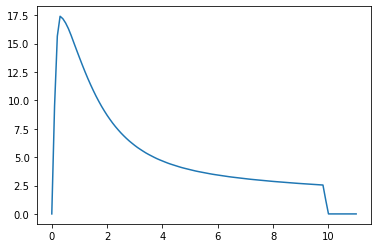

In [33]:
Zeff_all_4 = 0
for name in ['Xe4s','Xe4p','Xe4d']:
    ER,Zeff = get_zeff(name)
    Zeff_all_4 += Zeff
    
plt.plot(ER/1000,Zeff_all_4)

(0.0, 9.0)

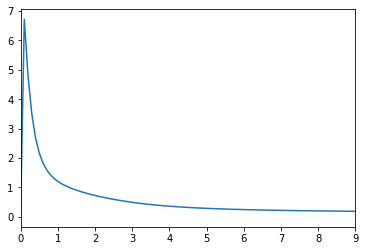

In [34]:
Zeff_all_5 = 0
for name in ['Xe5s','Xe5p']:
    ER,Zeff = get_zeff(name)
    Zeff_all_5 += Zeff
    
plt.plot(ER/1000,Zeff_all_5)
plt.xlim(0,9)

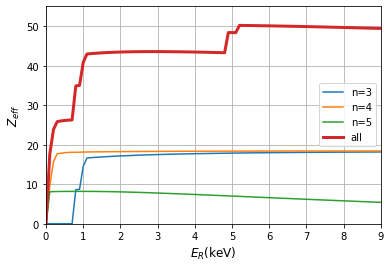

In [38]:

plt.plot(ER/1000,Zeff_all_3,label='n=3')
plt.plot(ER/1000,Zeff_all_4,label='n=4')
plt.plot(ER/1000,Zeff_all_5,label='n=5')
plt.plot(ER/1000,Zeff_all_1+Zeff_all_2+Zeff_all_3+Zeff_all_4+Zeff_all_5,linewidth=3,label='all')
plt.xlim(0,9)
plt.ylim(0,55)
plt.grid()
plt.legend()
plt.xlabel('$E_R$(keV)',size=12)
plt.ylabel('$Z_{eff}$',size=12)
plt.savefig('zeff.pdf')
plt.savefig('zeff.png')